# Discord Activity Analysis

In [164]:
import glob
import pandas as pd
import matplotlib as plt
import os
import re

list_of_csv_files = glob.glob('./*.csv')
list_of_csv_files.sort()

# read and merge all data exports from discord
merged = []

for csv in list_of_csv_files:
    df = pd.read_csv(csv)
    area = re.search('\│(.+?) \[', csv).group(1).lower()
    df['Area'] = os.path.basename(area)
    merged.append(df)


df = pd.concat(merged)
df1 = df

# # filter dates
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2022-07-01']
df = df[df['Date'] <= '2022-07-30']

df

# Testing just to check...
# print(len(df.query("Author == 'lucaspon#3865' and Area == 'community'")))
# df.query("Author == 'lucaspon#3865' and Area == 'community'")

,AuthorID,Author,Date,Content,Attachments,Reactions,Area
7343,861685730937274409,b123#2778,2022-07-01,"For the foreseeable future, we will not be buy...",NaN,NaN,curation
7344,832722913765097535,chadwicktyler#3331,2022-07-01,All of this discussion about Native vs. Back C...,NaN,NaN,curation
7345,861685730937274409,b123#2778,2022-07-01,Let's start with a public Twitter space with d...,NaN,this (1),curation
7346,817469690347257877,alexcartagenamex#4215,2022-07-01,up for it :praisepepe:,NaN,NaN,curation
7347,832722913765097535,chadwicktyler#3331,2022-07-01,In full support of this. Great idea!,NaN,NaN,curation
...,...,...,...,...,...,...,...
5932,693277954519728138,Lapsus#4632,2022-07-29,"Thanks, Trevor! Let's keep an eye on them 👀",NaN,❤️ (1),marketing-pr
5933,611655598383300658,samcronenberg#6745,2022-07-30,So i finished the first podcast episode visual...,NaN,"rawlogo (3),💯 (1)",marketing-pr
5934,611655598383300658,samcronenberg#6745,2022-07-30,Teaser 🎙️,NaN,NaN,marketing-pr
5935,693277954519728138,Lapsus#4632,2022-07-30,It looks fantastic tbh. I have an email accoun...,NaN,NaN,marketing-pr


In [176]:

# group by author; attachment messages are ignored
df2 = df[['Author','Content', 'Area']]
df2 = df2.groupby(['Author', 'Area'], as_index=False).count()
df2 = df2.sort_values(by=['Area','Content'], ascending=False)
df2 = df2[df2['Content'] >= 10]
df2 = df2[df2['Author'] != 'the RAW bot#0885']
df2.columns = ['Member','Area' ,'Discord Interactions']
df2['Qualified?'] = df2['Discord Interactions'].notna()
df2['Qualified?'] = df2['Qualified?'].map({True: '✅', False: ''}) 

pivoted = df2.pivot(index="Member", columns="Area", values="Qualified?")
pivoted = pivoted.fillna('')

pivoted


Area,community,curation,finance,governance,marketing-pr
Member,,,,,
JoseCactuss#2668,,✅,,,✅
Lapsus#4632,✅,✅,✅,✅,✅
MesutNFT#9591,,✅,,,
T2#4068,,✅,,✅,✅
[ARTS OS]#7634,✅,,,,
alexcartagenamex#4215,,✅,,,
b123#2778,,✅,,,
brileigh.eth#1111,✅,✅,✅,✅,✅
bthemouth#0088,,✅,,,


In [181]:
# data analysis

df1['Month'] = df1['Date'].dt.strftime("%Y-%m")
df1 = df1[['Month','Content']]
df1 = df1.groupby(['Month'], as_index=False).count()
df1.columns = ['Month', 'Discord Interactions']

df1

,Month,Discord Interactions
0,2021-11,1501
1,2021-12,3069
2,2022-01,2139
3,2022-02,210
4,2022-03,2497
5,2022-04,4859
6,2022-05,4662
7,2022-06,1735
8,2022-07,2207
9,2022-08,15


<AxesSubplot:xlabel='Month'>

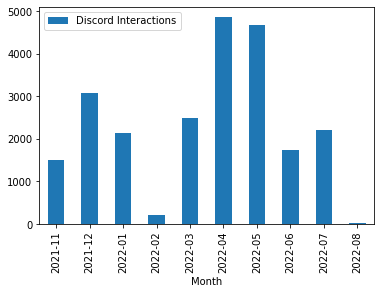

In [182]:
# plot data
df1.plot(x = 'Month', y = 'Discord Interactions',kind = 'bar')